<a href="https://www.kaggle.com/code/hossamahmedsalah/linear-regression-and-polynomial-regression-msp?scriptVersionId=142036509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display: flex; align-items: center;">
    <div style="flex: 1; padding-right: 20px;">
        <img src="https://github.com/hossamAhmedSalah/Machine_Learning_MSP/blob/main/Assets/image-removebg-preview.png?raw=true" alt="Image Alt Text" width="300">
    </div>
    <div style="flex: 2;">
      This is part of the Content of <span style="color :skyblue">MSP</span> (MICROSOFT STUDENT PARTNERS) Machine Learning Workshop 2023 , Helwan 
    </div>
 
</div>


# You can view other sessions via 
[GitHub - hossamAhmedSalah/Machine_Learning_MSP: MSP 23 workshop of machine learning](https://github.com/hossamAhmedSalah/Machine_Learning_MSP/tree/main)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

## Linear Regression Step by Step 🪜 

In [187]:
# Generate example data 
np.random.seed(42)
X = np.random.uniform(0, 5, size=(100, 1))  # Generate random numbers between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1) # the linear function =>3x+4

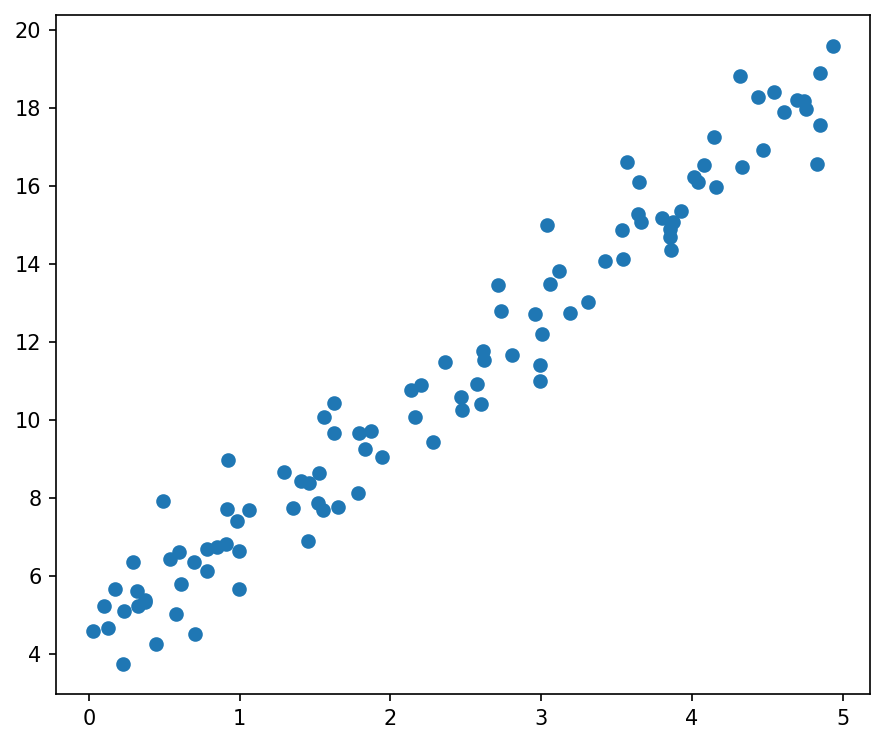

In [188]:
# so we created a dataset that alomst to be using for demostrating the Linear regression
# we need to build the Line that fit this data the most 
# actually we know it right ?🤔 
# yes we make it by our hands
# 3X+4 
# this should be the best fit 
fig = plt.figure(figsize=(7,6), dpi =150)
plt.scatter(X, y);


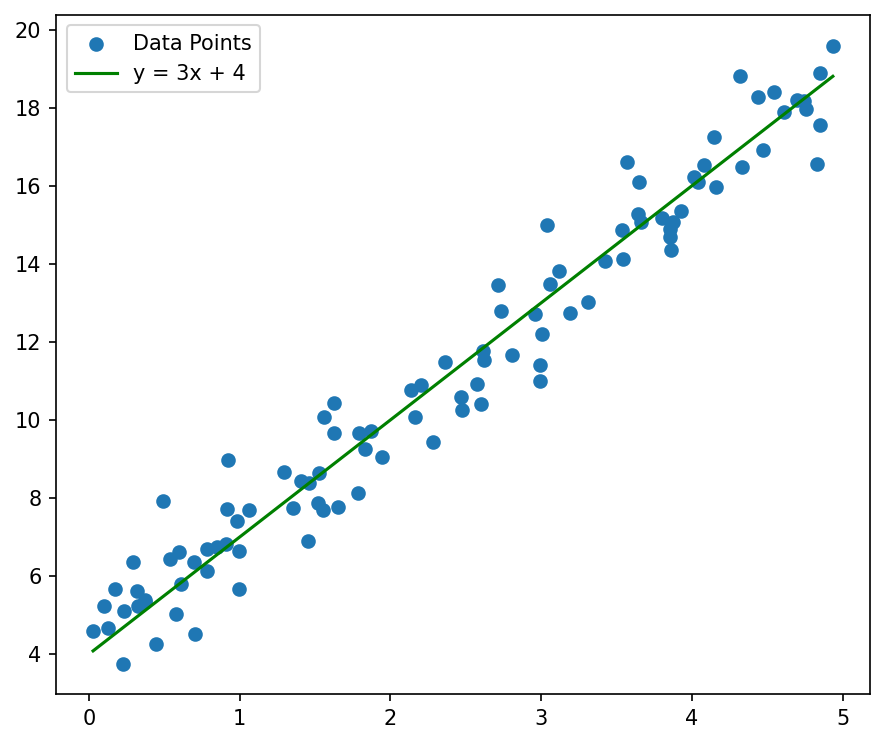

In [189]:
# let's plot the line represent this equation
# 3x + 4
fig = plt.figure(figsize=(7,6), dpi =150)
plt.scatter(X, y, label='Data Points')

# Plot the line y = 3x + 4
x_range = np.linspace(min(X), max(X), 100)
y_line = 3 * x_range + 4
plt.plot(x_range, y_line, color='green', label='y = 3x + 4')
plt.legend();


then → $e_i = y_i - \hat{y_i}$ represent the **residual**  

<aside>
📖 Residual : difference between an <b>observed</b> value and the <b>predicted</b> value of a variable.

</aside>

<aside>
📖 RSS (residual sum of squares) as :

$RSS = e_1^2 + e_2^2+ e_3^2+…+ e_n^2$

</aside>

In [190]:
# we make it a function for reusability 
def plotTheLine(intercept = 4, slope = 3, name='Line of Best Fit', plotBestToo= False):
    # 3x+4
    # intercept, slope = 4, 3

    # Calculate the residuals
    residuals = y - (slope * X + intercept)

    # Plot the data points
    fig = plt.figure(figsize=(7, 6), dpi=150)
    plt.scatter(X, y, label='Data Points')

    # Plot the line of best fit
    x_range = np.linspace(min(X), max(X), 100)
    y_line = slope * x_range + intercept
    plt.plot(x_range, y_line, color='green', label=name)
    if plotBestToo:
        x_range = np.linspace(min(X), max(X), 100)
        y_line = 3 * x_range + 4
        plt.plot(x_range, y_line, color='gold', label='Best fit line')


    # Plot the residuals as small lines
    for i in range(len(X)):
        '''
        [X[i], X[i]]:x-coordinates for the line segment to be plotted. 
                    X[i] represents the x-coordinate of the data point being considered.
                    By repeating X[i] twice, we create a vertical line segment.
                    imagine using one value for x no matter how the f(x) value would change it can't be in a different x value 

        [y[i], slope * X[i] + intercept]: This specifies the y-coordinates for the line segment. 
                y[i] represents the y-coordinate of the data point being considered,
                while slope * X[i] + intercept represents the predicted y-coordinate on the line of best fit for the given x-coordinate X[i]. 
                By connecting these two points, we create a line segment.
                y[i] represent the real value the blue point 
                while the equation represent our line 
        '''
        plt.plot([X[i], X[i]], [y[i], slope * X[i] + intercept], color='red', linewidth=0.5)

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Residuals')
    plt.legend()
    plt.show()


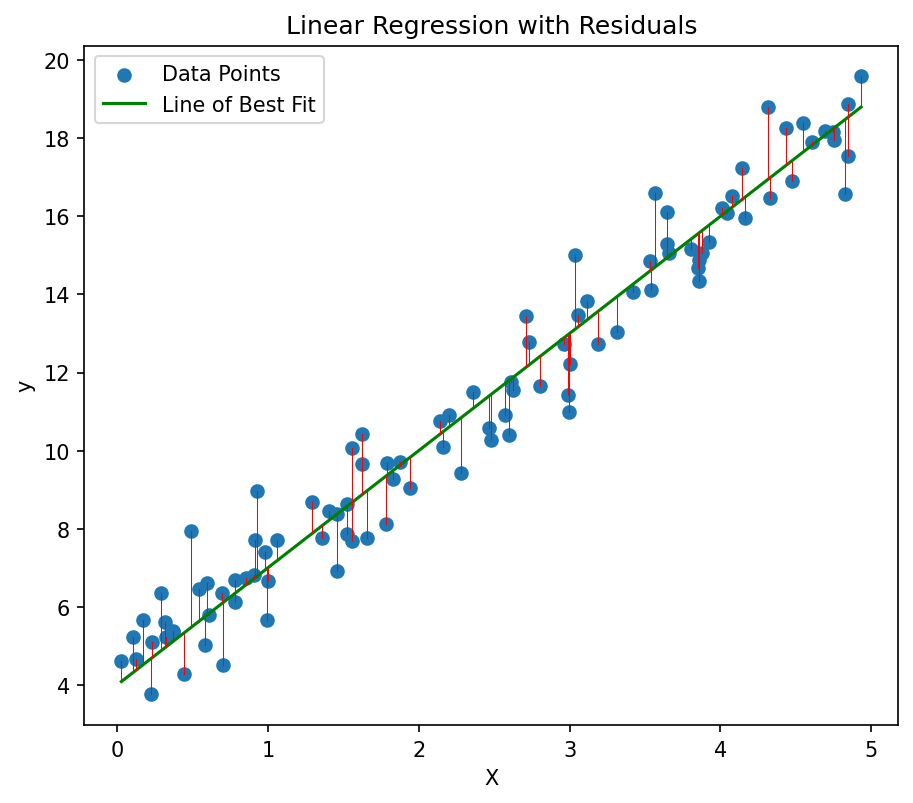

In [191]:
plotTheLine()

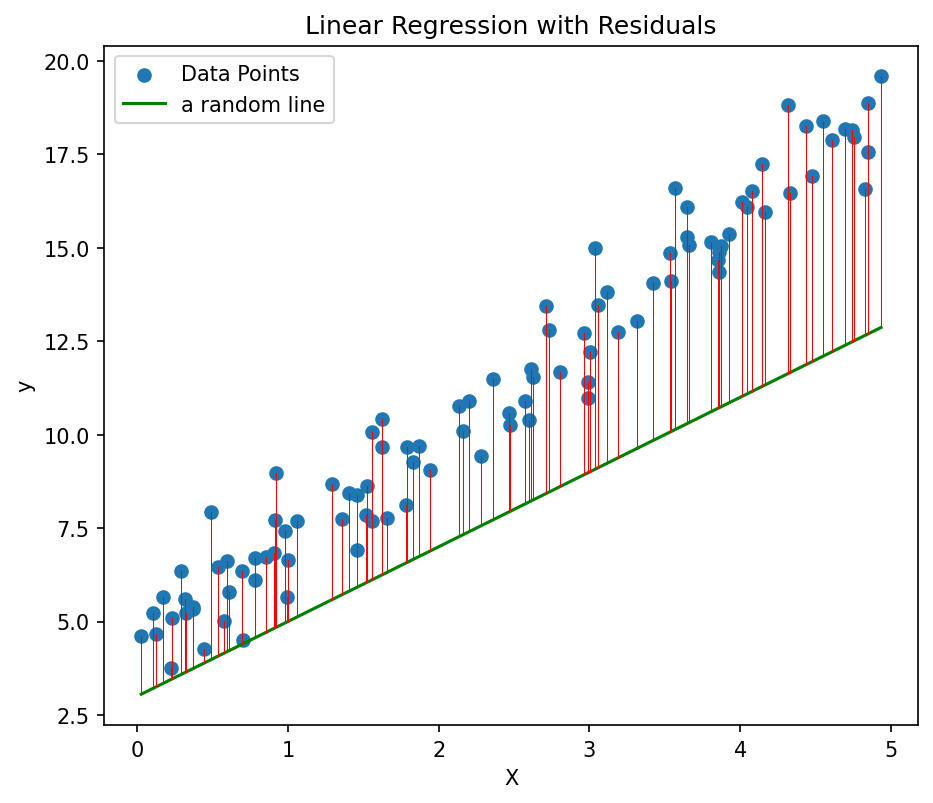

In [192]:
plotTheLine(3, 2, name='a random line')


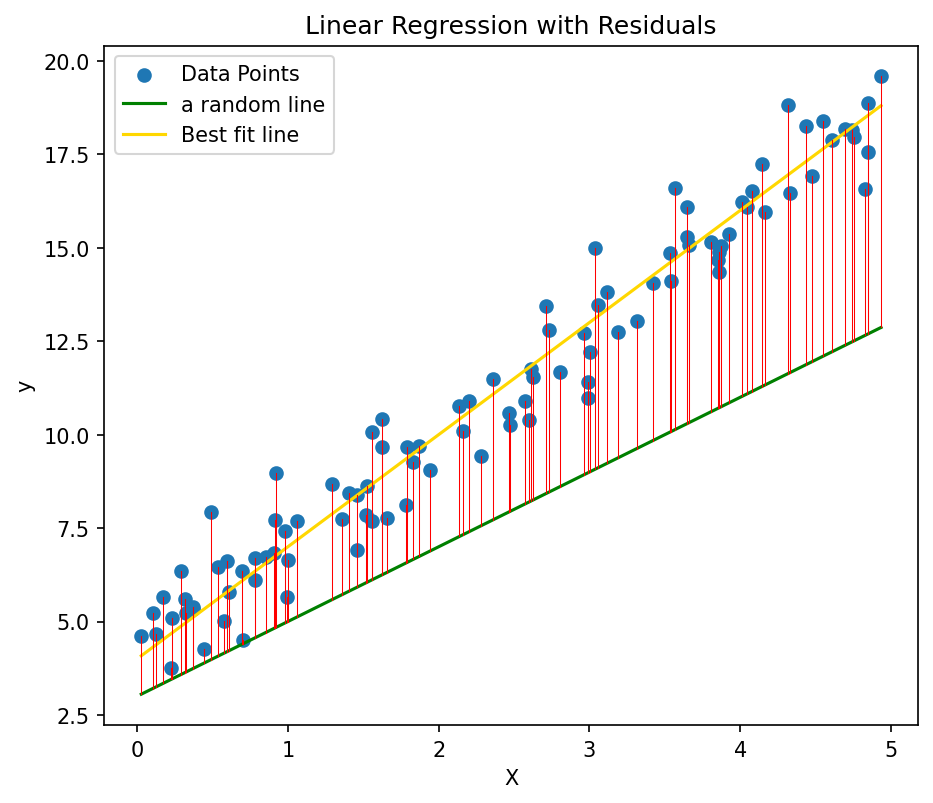

In [193]:
plotTheLine(3, 2, name='a random line', plotBestToo=True)
# 2x + 3

# Mean Absolute Error (MAE)

$$
MAE = \frac{1}{m} \displaystyle\sum ^n |y-\hat{y}|
$$

In [194]:
def MAE(X, y, slope, intercept):
    '''
    X (the independent feature), y (the dependent target)represent the real info we know about the data
    slope, intercept is just the estimate we try to guess to minimize the error 
    '''
    # Calculate predicted y-values
    y_pred = slope * X + intercept
    
    # Calculate absolute differences between predicted and actual y-values
    absolute_diff = np.abs(y - y_pred)
    
    # Calculate MAE
    mae = np.mean(absolute_diff)
    
    return mae

In [195]:
# the most minimized MAE we can reach
# should be the one resulting from the line 3x+4
# let's see what it's value
# MAE for the line 3x+4 
print(f"3x+4 Error:{MAE(X, y, 3, 4)}")
# MAE for the line 2x + 3
print(f"2x+3 Error:{MAE(X,y, 2, 3)}")

3x+4 Error:0.72111631295468

2x+3 Error:3.3498233567236895


# Mean Square Error (MSE)

In [196]:
def MSE(X, y, slope, intercept):
    '''
    X (the independent feature), y (the dependent target) represent the real info we know about the data
    slope, intercept is just the estimate we try to guess to minimize the error
    '''
    # Calculate predicted y-values
    y_pred = slope * X + intercept
    
    # Calculate squared differences between predicted and actual y-values
    squared_diff = (y - y_pred) ** 2
    
    # Calculate MSE
    mse = np.mean(squared_diff)
    
    return mse

In [197]:
# MSE for the line 3x+4 
print(f"3x+4 Error:{MSE(X, y, 3, 4)}")
# MSE for the line 2x + 3
print(f"2x+3 Error:{MSE(X,y, 2, 3)}")

3x+4 Error:0.8251067799079382

2x+3 Error:13.83396580438398


we want to minimize the error (the area of squares for MSE) by finding the optimal parameters of a line to best fit the points , a line is   $\red{slope} + \blue{intercept}$  ⇒ $\red{w_1}x+\blue{w_2}$

the Error function we use $MSE = \huge \frac{1}{m} \sum (y- \hat{y})^2$

the error function is also known as cost function .. the more cost more bad🙅‍♂️

$MSE = \huge \frac{1}{m} \sum (real~~ value- what~~ we~~ guess)^2$

to minimize is just to find the perfect slope and perfect intercept that make the MSE as minimum as possible 

$\huge \frac{\partial \red{Error}}{\partial w_j}$   

 j means for every parameter we have in our model equation we are going to find the optimal value

$\huge \frac{\partial \red{Error}}{\partial w_1} ( \huge \frac{1}{m} \sum (y- \hat{y})^2)$

recall that $\huge\hat{y} = \green{w_1x+w_2}$

$( \huge \frac{2}{m} \sum (y- \hat{y}))× \huge \frac{\partial \red{Error}}{\partial w_1} (y-\hat{y})$

 $\huge \frac{2}{m} \sum (y- \hat{y})× \huge \frac{\partial \red{Error}}{\partial w_1} (y-\green{w_1x+w_2})$

in partial derivative we only consider the variable $w_1$ and the rest are just constants even $x$ 

 $\huge \frac{2}{m} \sum (y- \hat{y})×  (-x)$ 1️⃣ we found the best value for slope that make the error minimized 

$y$ and $w_2$→ constants derivatives ⇒ 0 

$\huge \frac{\partial \red{w_1 x}}{\partial w_1} = x \huge \frac{\partial \red{w_1}}{\partial w_1} = x$ 

 

$\huge \frac{\partial \blue{Error}}{\partial w_2} ( \huge \frac{1}{m} \sum (y- \hat{y})^2)$

$( \huge \frac{2}{m} \sum (y- \hat{y}))× \huge \frac{\partial \blue{Error}}{\partial w_2} (y-\hat{y})$

 $\huge \frac{2}{m} \sum (y- \hat{y})× \huge \frac{\partial \blue{Error}}{\partial w_2} (y-\green{w_1x+w_2})$

 $\huge \frac{2}{m} \sum (y- \hat{y}) × 1$ 2️⃣

In [198]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    # Initialize slope and intercept
    slope = 0
    intercept = 0
    n = len(X)
    
    for iteration in range(num_iterations):
        # Calculate predicted y-values
        y_pred = slope * X + intercept
        
        # Calculate errors
        errors = y_pred - y
        
        # Calculate gradients
        slope_gradient = (2 / n) * np.dot(errors.T, X) # 1️⃣ 
        intercept_gradient = (2 / n) * np.sum(errors) # 2️⃣
        
        # Update slope and intercept
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
    
    return slope[0][0], intercept

In [199]:
print(gradient_descent(X, y))


(2.9133004282641086, 4.198424628216841)


In [200]:
print(gradient_descent(X, y, learning_rate=0.02))

(2.9080737738343316, 4.215005998485814)


MAE for gradient : 0.7010481951538362

MAE for 3x+4: 0.72111631295468

MSE for gradient : 0.8065845662812526

MSE for 3x+4: 0.8251067799079382


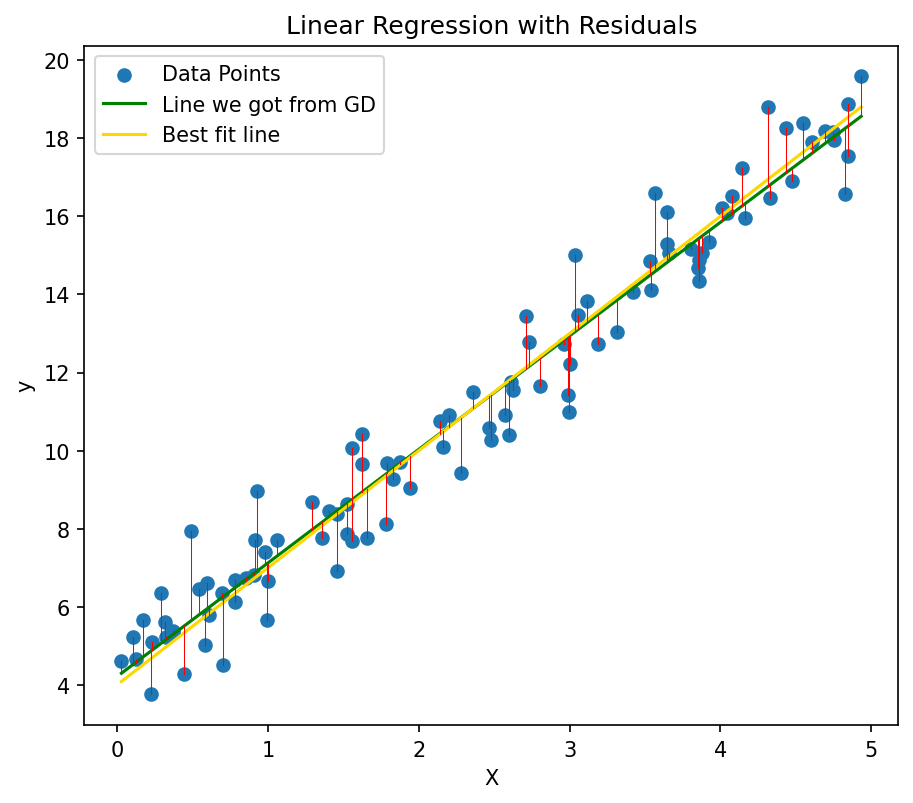

In [201]:
# so the gradient descent give us the slope , and the intercept 
# let's evaluate them 
slope, intercept = gradient_descent(X, y, learning_rate=0.02)
print(f"MAE for gradient : {MAE(X, y, slope, intercept)}")
print(f"MAE for 3x+4: {MAE(X, y, 3, 4)}")
print(f"MSE for gradient : {MSE(X, y, slope, intercept)}")
print(f"MSE for 3x+4: {MSE(X, y, 3, 4)}")
plotTheLine(intercept,slope, name= 'Line we got from GD', plotBestToo=True )


In [202]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.slope = None
        self.intercept = None

    # the GD 
    def fit(self, X, y):
        # Initialize slope and intercept
        self.slope = 0
        self.intercept = 0
        n = len(X)
        
        for iteration in range(self.num_iterations):
            # Calculate predicted y-values
            y_pred = self.slope * X + self.intercept
            
            # Calculate errors
            errors = y_pred - y
            
            # Calculate gradients
            slope_gradient = (2 / n) * np.dot(errors.T, X)
            intercept_gradient = (2 / n) * np.sum(errors)
            
            # Update slope and intercept
            self.slope -= self.learning_rate * slope_gradient
            self.intercept -= self.learning_rate * intercept_gradient
            
    # predict using the coff we got from the GD
    def predict(self, X):
        # Calculate predicted y-values
        y_pred = self.slope * X + self.intercept
        
        return y_pred

In [203]:
def MSE_2(y_pred, y_true):
    # note y_true and y_pred must be the same shape
    return np.mean((y_true - y_pred)**2 )
def MAE_2(y_pred, y_true):
    # note y_true and y_pred must be the same shape
    return np.mean(np.abs(y_true - y_pred) )

In [204]:
# let's try it
ourLinearModel = LinearRegression()
# let's fit the model to the data
ourLinearModel.fit(X,y)
# let's make predictions 
ourLinearModel.predict(3)

array([[12.93832591]])

In [205]:
# evaluation 
# let's predict 
y_pred = ourLinearModel.predict(X)
# let's evaluate 
print(f"MAE => {MAE_2(y, y_pred)}")
print(f"MSE => {MSE_2(y, y_pred)}")


MAE => 0.7020639783541714

MSE => 0.8066636924614289


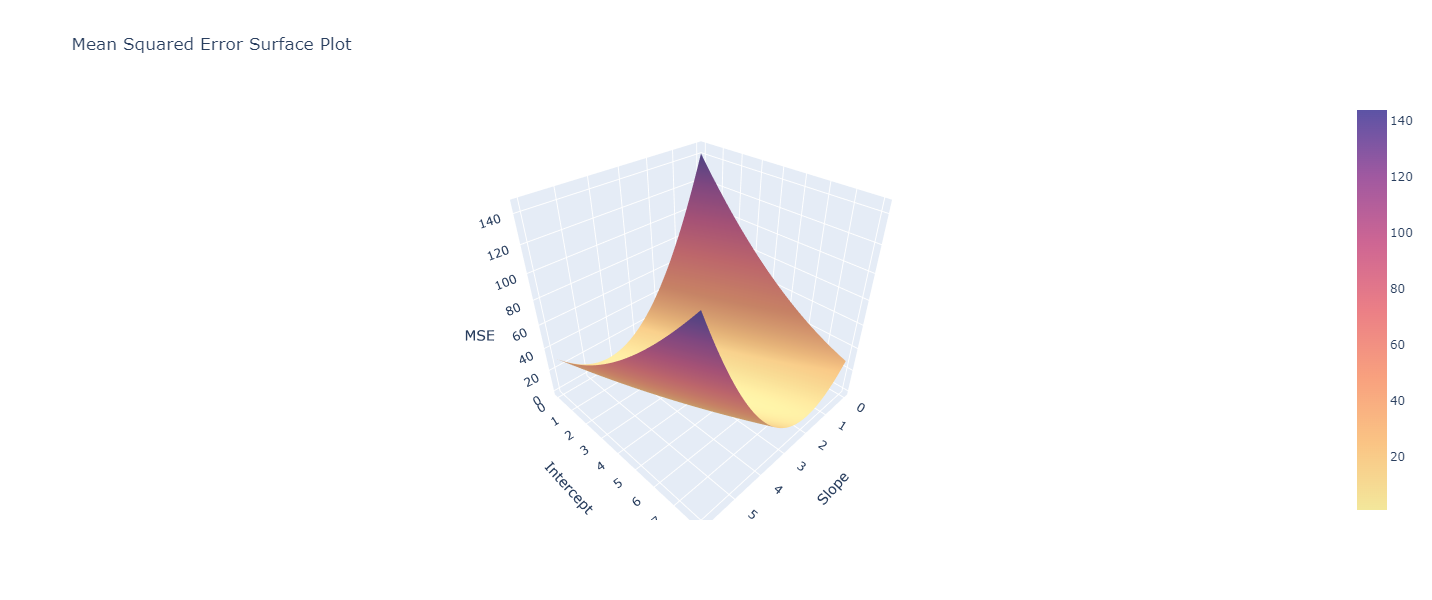

In [206]:
# 📝 you don't have to study this code just play with the graph to understand the idea of the gradient descent 
# Enjoy 🌟 and you can try plot different lines with different slops and intercepts and see how they work and what is better in terms of error minimization
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Create a range of slope and intercept values
slope_range = np.linspace(0, 6, 100)
intercept_range = np.linspace(0, 8, 100)
slope_values, intercept_values = np.meshgrid(slope_range, intercept_range)

# Calculate MSE for each combination of slope and intercept
mse_values = np.zeros_like(slope_values)
for i in range(len(slope_range)):
    for j in range(len(intercept_range)):
        mse_values[i, j] = MSE(X, y, slope_values[i, j], intercept_values[i, j])

# Create a 3D surface plot
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'surface'}]])

trace = go.Surface(x=slope_values, y=intercept_values, z=mse_values, colorscale='Jet')

# Update hover information
trace.hovertemplate = 'Slope: %{x}<br>Intercept: %{y}<br>MSE: %{z}'

fig.add_trace(trace)

fig.update_layout(scene=dict(xaxis_title='Slope', yaxis_title='Intercept', zaxis_title='MSE'))
fig.update_layout(title='Mean Squared Error Surface Plot')

# Set the size of the graph
fig.update_layout(height=600, width=800)

# Change the color map
fig.update_traces(colorscale='sunset')

fig.show()

# Using SkLearn 

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [208]:
# how to use ?
modelLR = LinearRegression()
# fitting the model
modelLR.fit(X, y)

LinearRegression()

In [209]:
# getting the coefficients {slope, intercepr}
slope = modelLR.coef_[0][0]
intercept = modelLR.intercept_[0]
print(slope, intercept)

2.9080453545753935 4.215096157546751


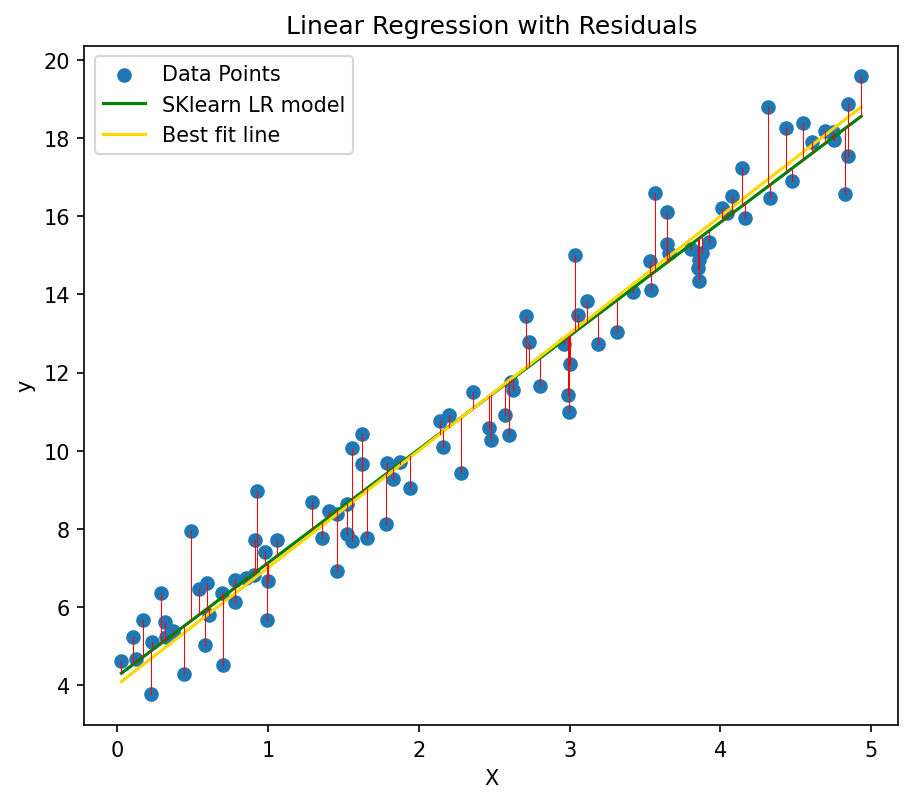

In [210]:
# we can plot it 
plotTheLine(intercept,slope, name= 'SKlearn LR model', plotBestToo=True)


In [211]:
# let's predict
y_pred = modelLR.predict(X)

# Calculate MAE and MSE using sklearn's functions
mae_sklearn = mean_absolute_error(y, y_pred)
mse_sklearn = mean_squared_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae_sklearn)
print("Mean Squared Error (MSE):", mse_sklearn)


Mean Absolute Error (MAE): 0.7010426719637757

Mean Squared Error (MSE): 0.806584563967053


In [212]:
# the function we built before 
MAE_2(y, y_pred)

0.7010426719637757

In [213]:
# the function we built before 
MSE_2(y, y_pred)

0.806584563967053

In [214]:
LinearRegression?

Init signature:

LinearRegression(

    *,

    fit_intercept=True,

    normalize='deprecated',

    copy_X=True,

    n_jobs=None,

    positive=False,

)

Docstring:     

Ordinary least squares Linear Regression.



LinearRegression fits a linear model with coefficients w = (w1, ..., wp)

to minimize the residual sum of squares between the observed targets in

the dataset, and the targets predicted by the linear approximation.



Parameters

----------

fit_intercept : bool, default=True

    Whether to calculate the intercept for this model. If set

    to False, no intercept will be used in calculations

    (i.e. data is expected to be centered).



normalize : bool, default=False

    This parameter is ignored when ``fit_intercept`` is set to False.

    If True, the regressors X will be normalized before regression by

    subtracting the mean and dividing by the l2-norm.

    If you wish to standardize, please use

    :class:`~sklearn.preprocessing.StandardScaler` before cal

In [215]:
# okay from the above cell we now can understand how Sklearn model work
# it uses the RSS which we mentioned before 
# fit_intercept : bool,
# we would speak later about normalization of the data 
# and how can we scale our data up or down (mostly down)
# one way of doing this is standared scaling whichh use the normal distribution or z_sccores
# making the data centered at the 0 mean =0 
# also this model can deal with high dimentions features Xs
# a linear regression in 3D is 2D 
# a Line in nD is n-1D 
# like how a square is 2D but a cube is 3D 

# Polynomial Regression

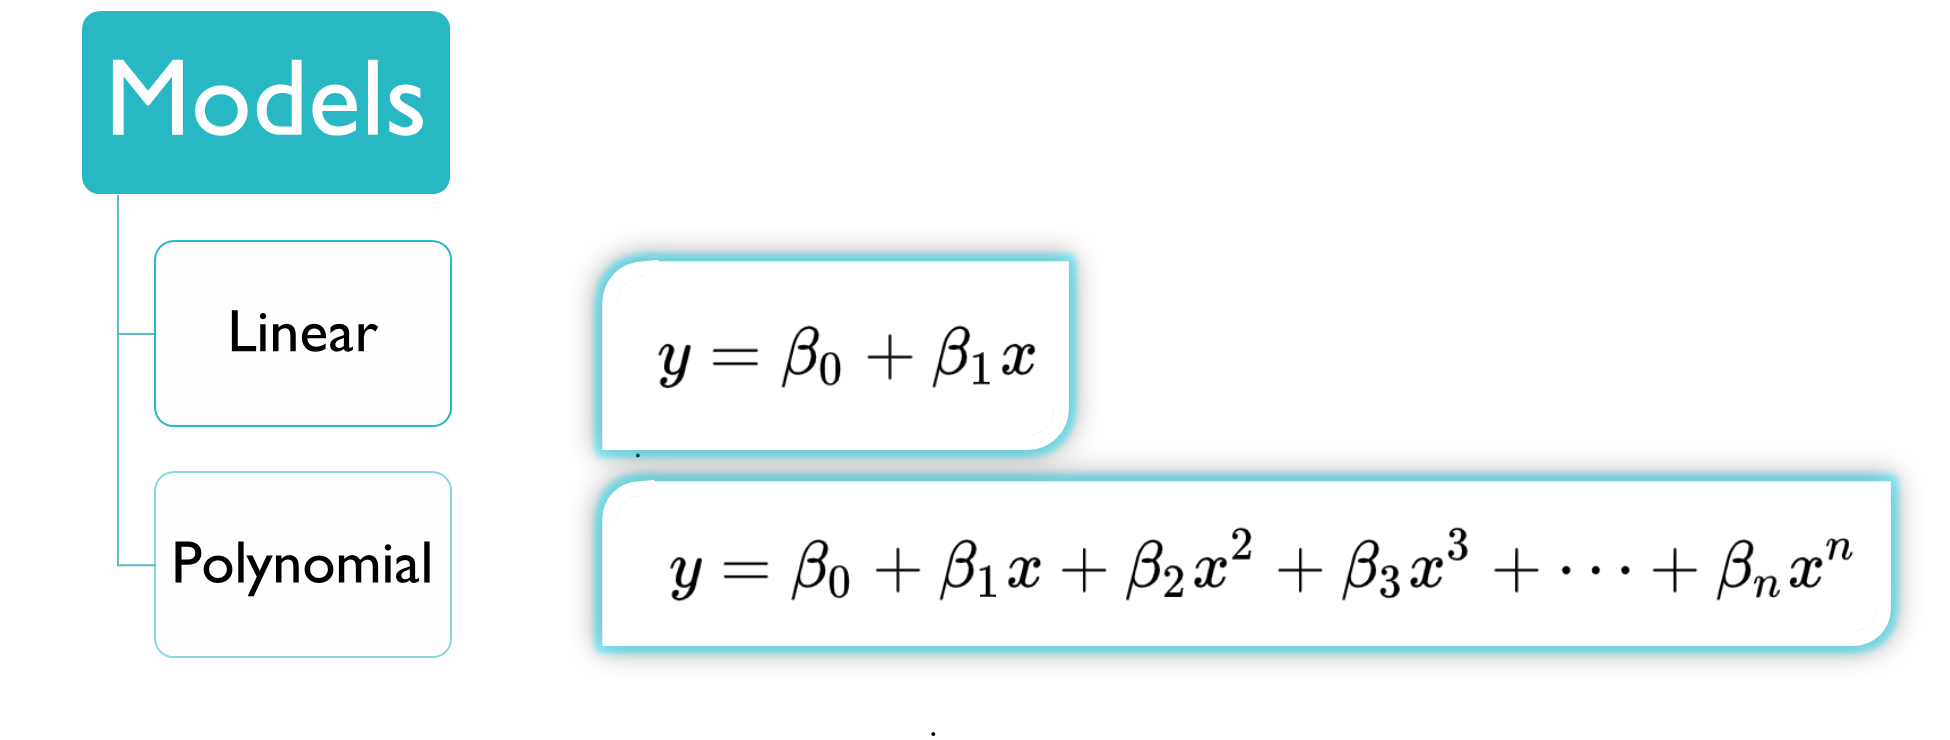

In [216]:
from sklearn.preprocessing import PolynomialFeatures

$0.5 X^2 + X + 2$ 1️⃣ 

In [217]:
np.random.seed(42)
X = np.random.uniform(-3, 3, size=(100, 1))
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) # 1️⃣ 

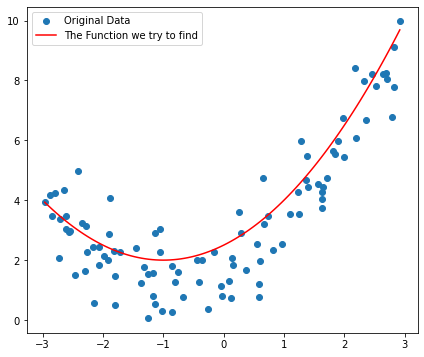

In [218]:
fig = plt.figure(figsize=(7,6))
plt.scatter(X, y, label='Original Data')
# let's try different values for the bias
bias = 0.5
xi = np.linspace(min(X), max(X), 100)
yi = 0.5 * xi**2 + xi + 2 + bias
plt.plot(xi, yi, label='The Function we try to find', color = 'red')
plt.legend()


In [219]:
degree = 2  # Degree of the polynomial
'''
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
'''
# include_bias is False as Linear Regression would add the bias anyway
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
# note we now have 2 features
X_poly.shape


(100, 2)

In [220]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [221]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [222]:
X_new_poly = poly_features.transform(X_poly.reshape(-1,1))
X_new_poly.shape

(200, 2)

In [223]:
# predictions
y_new = model.predict(X_new_poly)

In [224]:
# slopes
# B1+B2 
model.coef_

array([[0.93366893, 0.56456263]])

In [225]:
# intercept
# B0
model.intercept_

array([1.78134581])

(100, 1)

(100, 2)


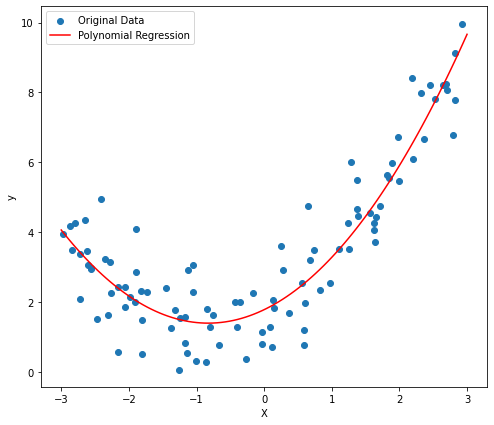

In [226]:
# Generate new data for prediction
# a random set of the data 100 sample from -3 to 3 and reshaped to be 1d col with 100 rows
# would be our x_axis in the graph
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
print(X_new.shape)
# default degress is 2 
X_new_poly = poly_features.transform(X_new)
print(X_new_poly.shape)
# using the linear model to predict the features
# y_new is our predictions
y_new = model.predict(X_new_poly)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(8,7))
# ploting the data points
plt.scatter(X, y, label='Original Data')
plt.plot(X_new, y_new, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

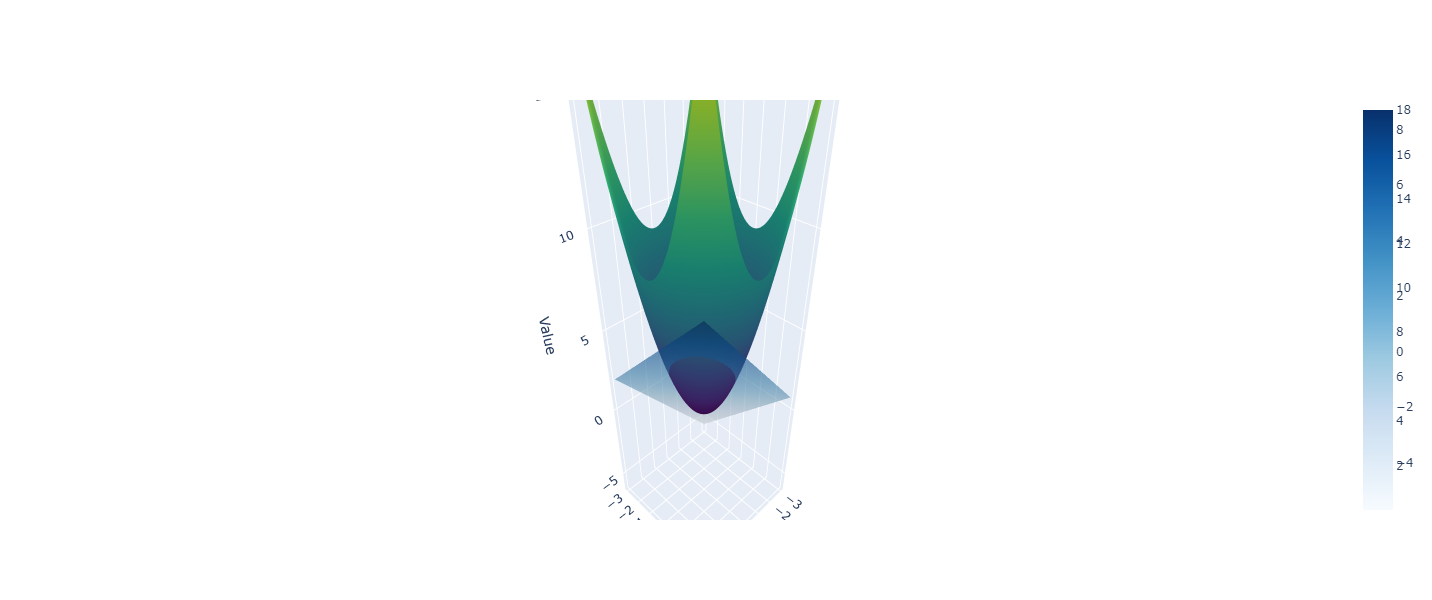

In [227]:
# Create a grid of X and Y values
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)

# Generate a quadratic function
Z = X**2 + Y**2

# Create a 3D surface plot for the quadratic function
surface_trace = go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', name='Quadratic Function')

# Create a subplot for the surface plot and hyperplane
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'surface'}]])

fig.add_trace(surface_trace)

# you can play with this 📝 
# Hyperplane parameters
w0 = 1.5
w1 = 1.3
w2 = 1.1
'''
w0 = 0.5
w1 = 0.3
w2 = 0.1
'''

# Calculate the values of the hyperplane
hyperplane_values = w0 + w1 * X + w2 * Y

# Create a 3D scatter plot for the hyperplane
scatter_trace = go.Surface(x=X, y=Y, z=hyperplane_values, opacity=0.6, colorscale='Blues', name='Hyperplane')

fig.add_trace(scatter_trace)

# Update layout
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Value'), width=1000, height=600)

# Show the plot
fig.show()


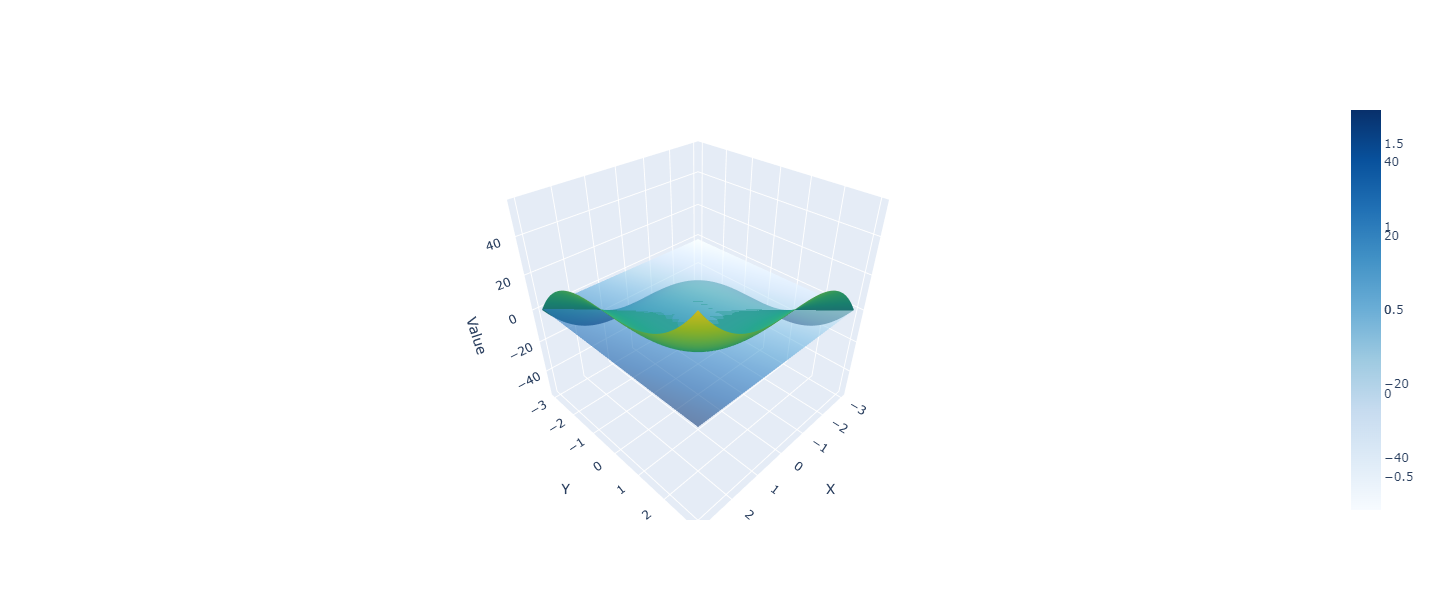

In [228]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a grid of X and Y values
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)

# Generate a cubic function
Z = X**3 + Y**3

# Create a 3D surface plot for the cubic function
surface_trace = go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', name='Cubic Function')

# Create a subplot for the surface plot
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'surface'}]])

fig.add_trace(surface_trace)

# Hyperplane parameters
w0 = 0.5
w1 = 0.3
w2 = 0.1

# Calculate the values of the hyperplane
hyperplane_values = w0 + w1 * X + w2 * Y

# Create a 3D surface plot for the hyperplane
scatter_trace = go.Surface(x=X, y=Y, z=hyperplane_values, opacity=0.6, colorscale='Blues', name='Hyperplane')

fig.add_trace(scatter_trace)

# Update layout
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Value'), width=1000, height=600)

# Show the plot
fig.show()


# Summary
## How polynomial Regression works?
1. project the features you have to a higher dimensions 
2. Applying Linear regression in higher dimesnsions is hyperplane the intersect of this hyperplane with the projected features would create these complex functions 

# SEE 👀 
https://stevenlio.shinyapps.io/polyfit/